<a href="https://colab.research.google.com/github/rickyrorton/neural-network-from-scratch-in-numpy/blob/main/mnist_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
data = pd.read_csv('drive/MyDrive/Colab Notebooks/mnist/train.csv')

Mounted at /content/drive
['.config', 'drive', 'sample_data']


In [ ]:
#initiate the data as a numpy array and shuffle it
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)
#testing dataset of about 1000 examples
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255
#training dataset
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255


In [ ]:
#initialise weights and biases
def initial_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1)  - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

#define ReLU and softmax functions
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_derivative(Z):
    return Z > 0

#define layers for the Neural network
def forward_propagation(W1, b1, W2, b2, X):
    #X is the input layer

    #First hidden layer
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    #Output layer
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

def final(Y):
    final_Y = np.zeros((Y.size, Y.max() + 1))
    final_Y[np.arange(Y.size), Y] = 1
    final_Y = final_Y.T
    return final_Y

#backward propagation is for finding values to update the weights and biases with
def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    final_Y = final(Y)
    dZ2 = A2 - final_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

#with the values found from back propagation update the weights and biases
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
#A2 is the output layer neuron's output values, this function gets the max of them
def get_predictions(A2):
    return np.argmax(A2, 0)

#calculates accuracy by no of correct predictions/total no. of predictions
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

#optimize the model to improve accuracy
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initial_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 20 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
#train the model
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.3, 501)

Iteration:  0
[7 6 7 ... 8 8 8] [9 0 7 ... 9 6 2]
0.09334146341463415
Iteration:  20
[9 0 7 ... 9 0 3] [9 0 7 ... 9 6 2]
0.5248780487804878
Iteration:  40
[9 0 7 ... 9 6 2] [9 0 7 ... 9 6 2]
0.6811463414634147
Iteration:  60
[9 0 7 ... 9 6 2] [9 0 7 ... 9 6 2]
0.7125121951219512
Iteration:  80
[9 0 7 ... 9 6 2] [9 0 7 ... 9 6 2]
0.7484878048780488
Iteration:  100
[9 0 7 ... 9 6 2] [9 0 7 ... 9 6 2]
0.7744634146341464
Iteration:  120
[9 0 7 ... 9 6 2] [9 0 7 ... 9 6 2]
0.7970243902439025
Iteration:  140
[9 0 7 ... 9 6 2] [9 0 7 ... 9 6 2]
0.818560975609756
Iteration:  160
[9 0 7 ... 9 6 2] [9 0 7 ... 9 6 2]
0.8350731707317073
Iteration:  180
[9 0 7 ... 9 6 2] [9 0 7 ... 9 6 2]
0.8491951219512195
Iteration:  200
[9 0 7 ... 9 6 2] [9 0 7 ... 9 6 2]
0.8580487804878049
Iteration:  220
[9 0 7 ... 9 6 2] [9 0 7 ... 9 6 2]
0.864390243902439
Iteration:  240
[9 0 7 ... 9 6 2] [9 0 7 ... 9 6 2]
0.8698048780487805
Iteration:  260
[9 0 7 ... 9 6 2] [9 0 7 ... 9 6 2]
0.8729512195121951
Iteration:  2

In [ ]:
print(W1, b1, W2, b2)

[[-0.23850118  0.05196695 -0.3316101  ... -0.17946066 -0.41520074
  -0.11722072]
 [-0.40744796  0.19352009 -0.19312439 ... -0.05041453 -0.24362582
   0.00541694]
 [ 0.41114275 -0.03299673 -0.25443444 ...  0.31674044 -0.17155287
  -0.38028352]
 ...
 [ 0.335289    0.09984932  0.24242182 ... -0.07311085 -0.09666567
   0.46225332]
 [-0.10809349 -0.35090186  0.33069776 ... -0.1001741   0.00781021
  -0.10211609]
 [-0.43472039  0.06591974  0.26512534 ...  0.47344702  0.38024126
  -0.19970075]] [[0.61843037]
 [0.50303592]
 [0.284235  ]
 [0.91710324]
 [0.34922094]
 [0.56781486]
 [0.26068415]
 [0.38047989]
 [0.30745039]
 [0.27181506]] [[-0.84950794 -0.03119467 -0.05841526  0.8873399  -0.1193982   0.25163363
  -0.50111437 -0.41255644  0.32768274 -0.08313623]
 [ 1.12452785 -0.67128853  0.29793487 -0.66037234 -0.02096869 -0.23702794
  -0.27924172  0.01041525 -0.28158088  0.01990574]
 [ 0.34049065  0.10992009 -0.07821067  0.65959354  0.25522433 -0.01440877
  -0.01504445  0.20370654 -0.61463309  0.12

In [ ]:
#A2 is the output values of the output layer's neurons
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

#make prediction for one single image
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

[3 6 0 1 8 8 6 7 6 9 5 0 8 1 1 6 1 1 4 2 6 3 2 2 2 6 6 8 6 7 6 4 0 1 8 9 4
 6 4 2 2 7 6 7 0 5 0 1 1 2 6 7 3 9 1 1 2 1 6 4 6 2 5 6 9 2 3 2 1 4 1 1 7 4
 6 4 4 6 6 9 9 9 0 8 9 5 1 2 6 1 0 0 8 7 1 6 2 9 3 4 6 6 0 5 9 6 1 8 6 4 5
 4 0 9 0 9 8 0 4 7 7 5 6 7 9 3 1 0 1 8 0 7 3 3 6 7 1 4 0 8 2 7 6 7 6 8 6 9
 1 9 4 0 1 2 5 4 0 9 1 9 4 7 0 6 7 0 3 7 2 7 2 6 8 1 3 4 6 1 3 6 6 3 8 8 2
 7 7 1 8 9 6 0 5 2 6 8 1 5 8 1 9 1 1 8 3 0 9 0 9 9 3 2 5 8 4 8 7 1 4 7 9 8
 3 7 3 9 4 7 1 2 8 7 4 2 4 3 6 2 5 0 9 5 7 8 5 9 7 5 7 0 2 1 4 2 6 0 1 7 6
 2 4 2 5 9 6 7 2 9 7 3 0 3 8 4 8 9 6 8 6 8 5 2 5 2 7 6 8 9 1 2 7 4 3 5 0 3
 5 3 7 6 3 1 9 2 6 7 3 1 4 2 7 2 1 9 3 1 0 3 3 4 8 5 1 8 2 2 6 9 5 7 3 1 8
 8 4 5 0 0 6 9 1 5 0 7 4 3 8 1 0 7 4 5 6 7 5 0 9 4 1 7 2 3 8 9 8 7 2 6 0 2
 7 8 7 0 1 7 7 4 9 8 7 4 3 1 3 0 7 8 5 5 0 8 4 9 5 7 9 8 2 8 4 0 9 9 5 4 8
 5 0 6 1 6 6 3 5 5 0 1 6 3 7 8 6 0 5 6 0 0 7 1 0 8 5 2 6 2 3 3 8 1 3 9 1 9
 7 2 7 0 1 0 8 2 7 6 9 0 9 1 3 1 3 0 9 5 4 9 1 7 0 7 2 4 7 6 1 9 7 5 9 3 1
 1 2 4 9 1 3 6 7 3 8 8 8 

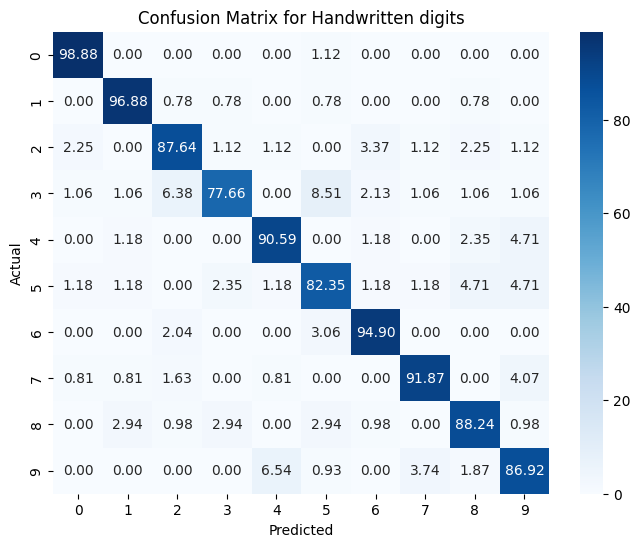

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(Y_dev, dev_predictions)
cm_percentages = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100 #Calculate values in terms of percentages

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentages, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Handwritten digits')
plt.show()